In [31]:
#library declarations


import pandas as pd
import datetime
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
#assign start and end dates
start_date=datetime(2015,1,1)
end_date=datetime(2021,9,9)
#populate the dataframe with data from the Yahoo Website
df = web.DataReader('AAPL', 'yahoo', start=start_date, end=end_date)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782114
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083958
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086231
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423965
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.362394


In [4]:
df.to_csv('./CSVfile/Name_file.csv')

In [5]:
pd.read_csv('./CSVfile/Name_file.csv', index_col=0)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782110
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083965
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086231
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423971
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.362398
...,...,...,...,...,...,...
2021-09-02,154.720001,152.399994,153.869995,153.649994,71115500.0,153.649994
2021-09-03,154.630005,153.089996,153.759995,154.300003,57808700.0,154.300003
2021-09-07,157.259995,154.389999,154.970001,156.690002,82278300.0,156.690002


In [6]:
df.isnull().values.any()

False

<AxesSubplot:xlabel='Date'>

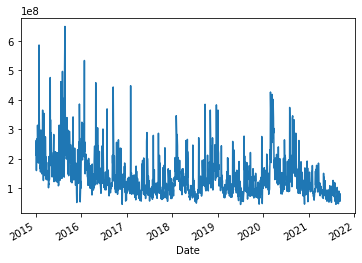

In [7]:
df["Volume"].plot()

<AxesSubplot:xlabel='Date'>

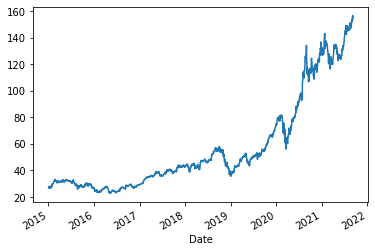

In [8]:
df["Close"].plot()

In [17]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782114
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083958
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086231
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423965
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.362394
...,...,...,...,...,...,...
2021-09-02,154.720001,152.399994,153.869995,153.649994,71115500.0,153.649994
2021-09-03,154.630005,153.089996,153.759995,154.300003,57808700.0,154.300003
2021-09-07,157.259995,154.389999,154.970001,156.690002,82278300.0,156.690002


In [18]:
df_reset = df.reset_index()

In [24]:
df_reset['DateNummeric'] = pd.to_datetime(df_reset['Date'])
df_reset['DateNummeric']=df_reset['Date'].map(dt.datetime.toordinal)
X=df_reset["DateNummeric"].values.reshape(-1, 1)

array([[735600],
       [735603],
       [735604],
       ...,
       [738040],
       [738041],
       [738042]])

In [25]:
Y=df["Close"].values

Y

array([ 27.33250046,  26.5625    ,  26.56500053, ..., 156.69000244,
       155.11000061, 154.07000732])

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=.7,random_state=42)
model = LinearRegression() #create linear regression object
model.fit(X_train,Y_train) #train model on train data
accuracy=model.score(X_test,Y_test)
accuracy

0.7556048505149158

In [37]:
X[-1:]

array([[738042]])

In [38]:
day = 1
X_future=np.array(X[-1:])+day
X_future


array([[738043]])

In [40]:
 forecast_set=model.predict(X)
 print(forecast_set)


[  4.31268769   4.44280969   4.4861837  ... 110.14524981 110.18862381
 110.23199781]


In [41]:
df["prediction"]=forecast_set

In [42]:
df

,High,Low,Open,Close,Volume,Adj Close,prediction
Date,,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782114,4.312688
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083958,4.442810
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086231,4.486184
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423965,4.529558
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.362394,4.572932
...,...,...,...,...,...,...,...
2021-09-02,154.720001,152.399994,153.869995,153.649994,71115500.0,153.649994,109.928380
2021-09-03,154.630005,153.089996,153.759995,154.300003,57808700.0,154.300003,109.971754
2021-09-07,157.259995,154.389999,154.970001,156.690002,82278300.0,156.690002,110.145250


<AxesSubplot:xlabel='Date'>

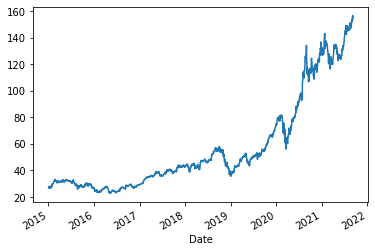

In [44]:
df["Close"].plot()

<AxesSubplot:xlabel='Date'>

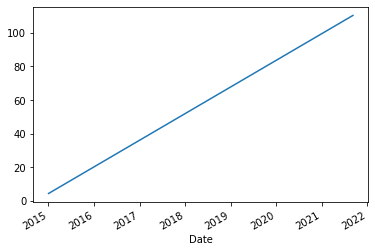

In [45]:
df["prediction"].plot()